## Import and Loading

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import pandas as pd
import numpy as np

from sklearn import datasets

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder, StandardScaler

import category_encoders
import scipy
import time

In [31]:
def loadData(directory):
    df = pd.read_csv(directory,sep="\t")
    return df

def preprocessingV4(X_d,X_e,labels):
    
    X_d = X_d.fillna("other")
    X_e = X_e.fillna("other")
    
    df = pd.concat([X_d,X_e])
    df_enc = pd.get_dummies(df)
    df_enc_scipy = scipy.sparse.csr_matrix(df_enc.values)
    
    return df_enc_scipy[:X_d.shape[0]],df_enc_scipy[X_d.shape[0]:]


def preprocessingV5(X_d,X_e,labels):
    
    X_d = X_d.fillna("other")
    X_e = X_e.fillna("other")
    
    df = pd.concat([X_d,X_e])
    
    for label in labels:
        
        top_labels_index = df[label].value_counts().index
        top_labels_length = len(df[label].value_counts().index)
        thresh = round(top_labels_length * 50 / 100)
        ##100
        thresh = top_labels_length
        
        top = df[label].isin(top_labels_index[:thresh])
        df.loc[~top, label] = "other"
    
    df_enc = scipy.sparse.csr_matrix(pd.get_dummies(df).values)
    
    return df_enc[:X_d.shape[0]],df_enc[X_d.shape[0]:]


def evaluateModels(models, targets,X,y):
    
    scores = pd.DataFrame()
    
    for model,target in zip(models,targets):
        cv = RepeatedKFold(n_splits=3, n_repeats=1, random_state=42)
        scores[target] = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
        
        print(f"{target} has been concluded")
        
    return scores

In [5]:
X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

In [89]:
X_dev["designation"].value_counts().index[:5]

Index(['Reserve', 'Reserva', 'Estate', 'Barrel sample', 'Riserva'], dtype='object')

## Preprocessing with filters and partial encoding

Wall time: 18min 20s


Text(0, 0.5, 'R2_Score')

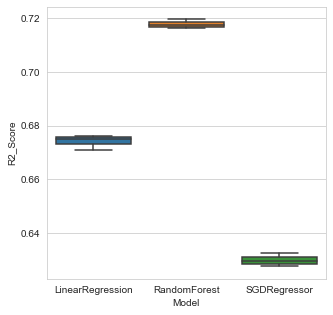

In [24]:
%%time

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')
min_thresh = 0
max_thresh = 100


X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]

X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2','designation'])
X_eval = X_eval.drop(columns=['description','region_2','designation'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['country','province','variety','winery','region_1']
t = [17,80,80,100,60]
X_dev_prep, X_eval_prep = preprocessingV4(X_dev_filtered,X_eval,features_to_encode,t)


from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###########################################################
## 0/100 con duplicati - tutti gli elementi codificati
## senza designation
###########################################################

f{model} has been concluded
f{model} has been concluded
f{model} has been concluded
Wall time: 17min 32s


Text(0, 0.5, 'R2_Score')

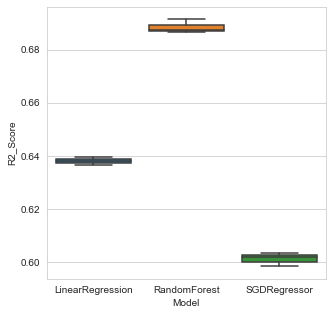

In [27]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

min_thresh = X_dev["quality"].quantile(0.025)
max_thresh = X_dev["quality"].quantile(0.975)
#min_thresh = 0
#max_thresh = 100


X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]
X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2','designation'])
X_eval = X_eval.drop(columns=['description','region_2','designation'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['country','province','variety','winery','region_1']
#t = [17,80,80,100,60]
X_dev_prep, X_eval_prep = preprocessingV4(X_dev_filtered,X_eval,features_to_encode,t)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 2.5th Q / 97.5th Q con duplicati - tutti gli elementi codificati
## senza designation
###################################################################

LinearRegression() has been concluded
RandomForestRegressor() has been concluded
SGDRegressor() has been concluded
Wall time: 22min 24s


Text(0, 0.5, 'R2_Score')

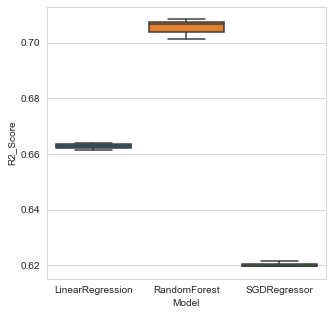

In [30]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

min_thresh = 20
max_thresh = 80

X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]
X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2','designation'])
X_eval = X_eval.drop(columns=['description','region_2','designation'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['country','province','variety','winery','region_1']
#t = [17,80,80,100,60]
X_dev_prep, X_eval_prep = preprocessingV4(X_dev_filtered,X_eval,features_to_encode,t)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 20/80 Q con duplicati - tutti gli elementi codificati
## senza designation
###################################################################

LinearRegression has been concluded
RandomForest has been concluded
SGDRegressor has been concluded
Wall time: 17min 47s


Text(0, 0.5, 'R2_Score')

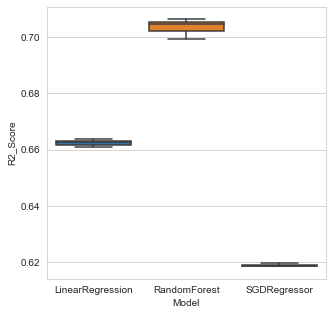

In [32]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

min_thresh = 20
max_thresh = 80

X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]
X_dev_filtered = X_dev_filtered.drop(columns=['country','description','region_2','designation'])
X_eval = X_eval.drop(columns=['country','description','region_2','designation'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['province','variety','winery','region_1']
#t = [17,80,80,100,60]
X_dev_prep, X_eval_prep = preprocessingV4(X_dev_filtered,X_eval,features_to_encode,t)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 20/80 Q con duplicati - tutti gli elementi codificati
## senza designation e country
###################################################################

LinearRegression has been concluded
RandomForest has been concluded
SGDRegressor has been concluded
Wall time: 17min 21s


Text(0, 0.5, 'R2_Score')

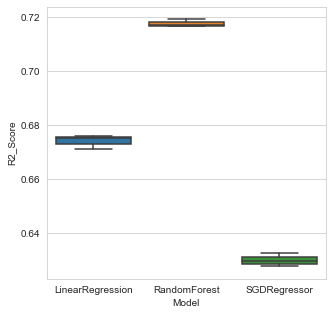

In [35]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

min_thresh = 0
max_thresh = 100

X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]
X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2','designation'])
X_eval = X_eval.drop(columns=['description','region_2','designation'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['province','variety','winery','region_1','country']
#t = [17,80,80,100,60]
X_dev_prep, X_eval_prep = preprocessingV4(X_dev_filtered,X_eval,features_to_encode,t)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 0/100 Q con duplicati - tutti gli elementi codificati
## -- senza designation
###################################################################

LinearRegression has been concluded
RandomForest has been concluded
SGDRegressor has been concluded
Wall time: 15min 36s


Text(0, 0.5, 'R2_Score')

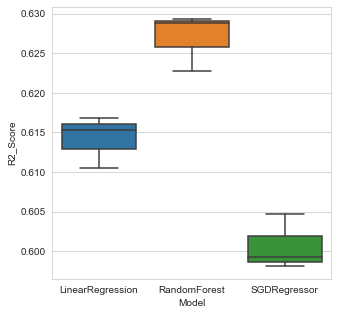

In [36]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_dev = X_dev.drop_duplicates()
X_eval = loadData('Dataset/eval.tsv')

min_thresh = 0
max_thresh = 100

X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]
X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2','designation'])
X_eval = X_eval.drop(columns=['description','region_2','designation'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['province','variety','winery','region_1','country']
#t = [17,80,80,100,60]
X_dev_prep, X_eval_prep = preprocessingV4(X_dev_filtered,X_eval,features_to_encode,t)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 0/100 Q senza duplicati - tutti gli elementi codificati
## -- senza designation
###################################################################

LinearRegression has been concluded
RandomForest has been concluded
SGDRegressor has been concluded
Wall time: 11min 36s


Text(0, 0.5, 'R2_Score')

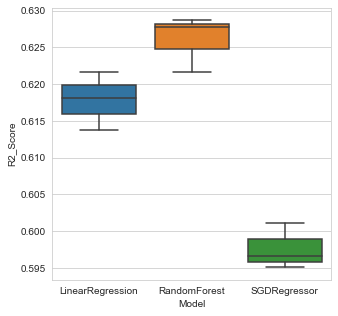

In [15]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_dev = X_dev.drop_duplicates()
X_eval = loadData('Dataset/eval.tsv')

min_thresh = 0
max_thresh = 100

X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]

X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2','designation'])
X_eval = X_eval.drop(columns=['description','region_2','designation'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['province','variety','winery','region_1','country']
X_dev_prep, X_eval_prep = preprocessingV5(X_dev_filtered,X_eval,features_to_encode)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 0/100 Q senza duplicati - tutti gli elementi codificati
## -- senza designation | 80% delle features
###################################################################

LinearRegression has been concluded
RandomForest has been concluded
SGDRegressor has been concluded
Wall time: 13min 1s


Text(0, 0.5, 'R2_Score')

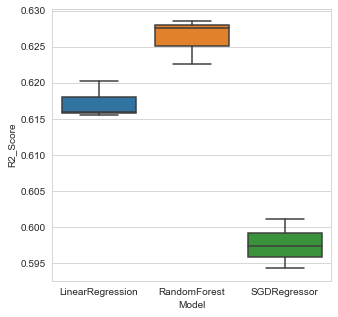

In [17]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_dev = X_dev.drop_duplicates()
X_eval = loadData('Dataset/eval.tsv')

min_thresh = 0
max_thresh = 100

X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]

X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2','designation'])
X_eval = X_eval.drop(columns=['description','region_2','designation'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['province','variety','winery','region_1','country']
X_dev_prep, X_eval_prep = preprocessingV5(X_dev_filtered,X_eval,features_to_encode)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 0/100 Q senza duplicati - tutti gli elementi codificati
## -- senza designation | 90% degli elementi per colonna
###################################################################

LinearRegression has been concluded
RandomForest has been concluded
SGDRegressor has been concluded
Wall time: 15min 58s


Text(0, 0.5, 'R2_Score')

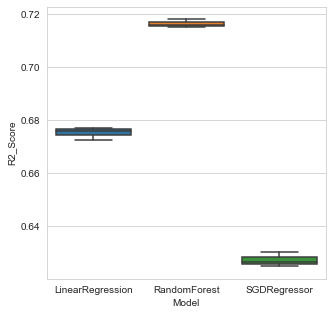

In [19]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

min_thresh = 0
max_thresh = 100

X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]

X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2','designation'])
X_eval = X_eval.drop(columns=['description','region_2','designation'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['province','variety','winery','region_1','country']
X_dev_prep, X_eval_prep = preprocessingV5(X_dev_filtered,X_eval,features_to_encode)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 0/100 Q con duplicati - tutti gli elementi codificati
## -- senza designation | 80% degli elementi per colonna
###################################################################

LinearRegression has been concluded
RandomForest has been concluded
SGDRegressor has been concluded
Wall time: 11min 26s


Text(0, 0.5, 'R2_Score')

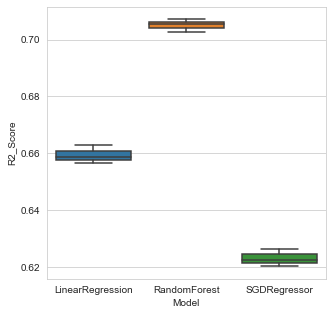

In [27]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

min_thresh = 0
max_thresh = 100

X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]

X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2','designation'])
X_eval = X_eval.drop(columns=['description','region_2','designation'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['province','variety','winery','region_1','country']
X_dev_prep, X_eval_prep = preprocessingV5(X_dev_filtered,X_eval,features_to_encode)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 0/100 Q con duplicati - tutti gli elementi codificati
## -- senza designation | 50% degli elementi per colonna
###################################################################

LinearRegression has been concluded
RandomForest has been concluded
SGDRegressor has been concluded
Wall time: 29min 5s


Text(0, 0.5, 'R2_Score')

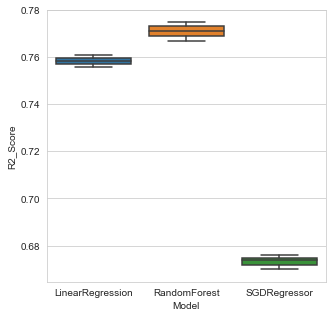

In [28]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

min_thresh = 0
max_thresh = 100

X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]

X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2'])
X_eval = X_eval.drop(columns=['description','region_2'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['designation','province','variety','winery','region_1','country']
X_dev_prep, X_eval_prep = preprocessingV5(X_dev_filtered,X_eval,features_to_encode)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 0/100 Q con duplicati - tutti gli elementi codificati
## | 50% degli elementi per colonna
###################################################################

LinearRegression has been concluded
RandomForest has been concluded
Wall time: 28.9 s


Text(0, 0.5, 'R2_Score')

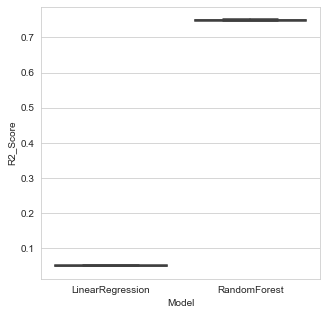

In [39]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

min_thresh = 0
max_thresh = 100

X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]

X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2'])
X_eval = X_eval.drop(columns=['description','region_2'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['designation','province','variety','winery','region_1','country']
X_dev_prep, X_eval_prep = preprocessingV5(X_dev_filtered,X_eval,features_to_encode)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 0/100 Q con duplicati - tutti gli elementi codificati
## | 70% degli elementi per colonna
###################################################################

LinearRegression has been concluded
RandomForest has been concluded
SGDRegressor has been concluded
Wall time: 37min 14s


Text(0, 0.5, 'R2_Score')

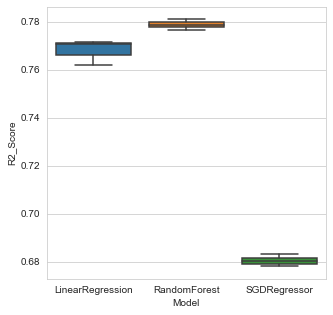

In [42]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

min_thresh = 0
max_thresh = 100

X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]

X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2'])
X_eval = X_eval.drop(columns=['description','region_2'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['designation','province','variety','winery','region_1','country']
X_dev_prep, X_eval_prep = preprocessingV5(X_dev_filtered,X_eval,features_to_encode)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 0/100 Q con duplicati - tutti gli elementi codificati
## | 70% degli elementi per colonna
###################################################################

LinearRegression has been concluded
RandomForest has been concluded
SGDRegressor has been concluded
Wall time: 45min 26s


Text(0, 0.5, 'R2_Score')

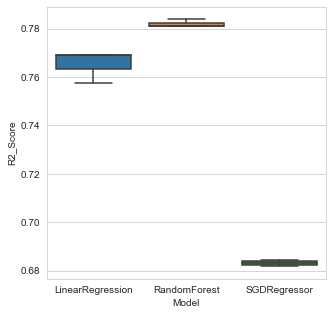

In [44]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

min_thresh = 0
max_thresh = 100

X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]

X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2'])
X_eval = X_eval.drop(columns=['description','region_2'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['designation','province','variety','winery','region_1','country']
X_dev_prep, X_eval_prep = preprocessingV5(X_dev_filtered,X_eval,features_to_encode)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 0/100 Q con duplicati - tutti gli elementi codificati
## | 85% degli elementi per colonna
###################################################################

In [ ]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

min_thresh = 0
max_thresh = 100

X_dev_filtered = X_dev[ X_dev["quality"] >= min_thresh]
X_dev_filtered = X_dev_filtered[ X_dev_filtered["quality"] <= max_thresh]

X_dev_filtered = X_dev_filtered.drop(columns=['description','region_2'])
X_eval = X_eval.drop(columns=['description','region_2'])

y = X_dev_filtered.quality
X_dev_filtered = X_dev_filtered.drop(columns=["quality"])

features_to_encode = ['designation','province','variety','winery','region_1','country']
X_dev_prep, X_eval_prep = preprocessingV5(X_dev_filtered,X_eval,features_to_encode)

fig, ax = plt.subplots(figsize=(5, 5))
models = [LinearRegression(),RandomForestRegressor(),SGDRegressor()]
targets = ["LinearRegression","RandomForest","SGDRegressor"]

scores = evaluateModels(models,targets,X_dev_prep,y)
sns.boxplot(x="variable", y="value", data=pd.melt(scores), ax=ax)
plt.xlabel("Model")
plt.ylabel("R2_Score")
###################################################################
## 0/100 Q con duplicati - tutti gli elementi codificati
## | 100% degli elementi per colonna
###################################################################

## Preprocessing selection


In [ ]:
%%time
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

y = X_dev.quality
X_dev = X_dev.drop(columns=["description","region_2","quality"])
X_eval = X_eval.drop(columns=["description","region_2"])

features_to_encode = ['designation','province','variety','winery','region_1','country']
X_dev_prep, X_eval_prep = preprocessingV4(X_dev,X_eval,features_to_encode)

In [ ]:
X_dev_prep.shape, X_eval_prep.shape

## Hyperparameter tuning

In [23]:
def doGridSearch(model,model_name,hyperparams,X,y):
    gs = GridSearchCV(estimator=model,  
                         param_grid=hyperparams,
                         scoring='r2',
                         cv=3,
                         n_jobs=4,
                         verbose=True)

    gs.fit(X, y)
    return gs

In [24]:
hyperparams_RF = {
    "n_estimators": [300],
    #"criterion": ["mse", "mae"],
    "max_features": ["auto"],
    "random_state": [42],# always use the samet random seed
    "n_jobs": [4],# for parallelization
}

gs = doGridSearch(RandomForestRegressor(verbose=True), "RandomForestRegressor",hyperparams_RF,X_dev_prep,y)
print(f"Best params:\t{gs.best_params_}")
print(f"Best score:\t{gs.best_score_}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed: 26.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  9.6min


Best params:	{'max_features': 'auto', 'n_estimators': 300, 'n_jobs': 4, 'random_state': 42}
Best score:	0.7134175554757253


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed: 15.0min finished


In [8]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(X_dev_prep,y)

RandomForestRegressor()

## Prediction

In [9]:
def get_csv(ids, y):
    pd.DataFrame(dict(Id = ids,Predicted = y)).to_csv("submission20.csv",sep=",",index=False)

y_pred = rf.predict(X_eval_prep)
get_csv(list(X_eval.index),y_pred)

## Submissions

### Submission 16 : 0.774 
* fit the StandardScaler on the development set
* y = winsorize(X_dev["quality"], limits=[0.1, 0.1])

### Submission 17 : 0.753
* sparse matrix with getDummies 
* with duplicates
* 80% of each categorical elements
* RandomForestRegressor : {'max_features': 'auto', 'n_estimators': 300, 'n_jobs': 4, 'random_state': 42}
* quality from 0 to 100
* without description, designation and region_2

### Submission 18 : 0.820
* sparse matrix with getDummies 
* with duplicates
* 50% of each categorical elements
* RandomForestRegressor (naive)
* quality from 0 to 100
* without description, and region_2

### Submission 19 : 0.832
* sparse matrix with getDummies 
* with duplicates
* 85% of each categorical elements
* RandomForestRegressor (naive)
* quality from 0 to 100
* without description, and region_2

### Submission 20 : 
* sparse matrix with getDummies 
* with duplicates
* 85% of each categorical elements
* RandomForestRegressor (naive)
* quality from 0 to 100
* without description, and region_2

In [5]:
X_d = loadData('Dataset/dev.tsv')
X_e = loadData('Dataset/eval.tsv')

X_d = X_d.fillna("other")
X_e = X_e.fillna("other")

X_d = X_d.drop(columns=['description','region_2','quality'])
X_e = X_e.drop(columns=['description','region_2'])

df = pd.concat([X_d,X_e])

In [6]:
df_enc = pd.get_dummies(df)

In [7]:
df_enc.shape

(150930, 47806)

In [8]:
df_enc_scipy = scipy.sparse.csr_matrix(pd.get_dummies(df).values)

In [10]:
df_enc_scipy.shape

(150930, 47806)

In [11]:
dev = df_enc_scipy[:X_d.shape[0]]
eva = df_enc_scipy[X_d.shape[0]:]

In [12]:
dev.shape

(120744, 47806)

In [13]:
eva.shape

(30186, 47806)

In [27]:
df_enc_scipy

<150930x47806 sparse matrix of type '<class 'numpy.uint8'>'
	with 905580 stored elements in Compressed Sparse Row format>